In [1]:
import xarray as xr
import xrft
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid
from datatree import open_datatree, DataTree 

In [2]:
import sys
sys.path.append('../modules/')

%reload_ext autoreload
%autoreload 2

from prepare_experiments import load_config

import DG_sim_analysis_modules as sam

In [3]:
# Load HR model
dir_HR = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/double_gyre_HR/'

ds_HR = {}
ds_HR['prog'] = xr.open_mfdataset(dir_HR+'prog_*.nc', decode_times=False)
ds_HR['oce_stats'] = xr.open_dataset(dir_HR +'ocean.stats.nc', decode_times=False)

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [65]:
ds_filt  = sam.filter_dataset(ds_HR['prog'])

In [66]:
ds_filt['RV'] = ds_filt.dvdx - ds_filt.dudy

In [6]:
exp_dir_hmin20 = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/31Mar/runs/tests/res_20km_ANN_1.0_hmin_20/'
exp_dir_hmin5 = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/31Mar/runs/tests/res_20km_ANN_1.0_hmin_5/'
exp_dir_hmin1 = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/31Mar/runs/res_20km_ANN_1.0/'

In [31]:
exp_dir_LR = '/scratch/db194/mom6/base_experiments_2025/DoubleGyre/31Mar/runs/res_20km_ANN_0.0/'

In [32]:
ds_LR = {}
ds_LR['prog'] = xr.open_mfdataset(exp_dir_LR+'OUTPUT/prog*.nc', decode_times=False)
ds_LR['oce_stats'] = xr.open_mfdataset(exp_dir_LR+'OUTPUT/ocean.stats.nc', decode_times=False)

In [5]:
ds_hmin1 = {}
ds_hmin1['prog'] = xr.open_mfdataset(exp_dir_hmin1+'OUTPUT/prog*.nc', decode_times=False)
ds_hmin1['oce_stats'] = xr.open_mfdataset(exp_dir_hmin1+'OUTPUT/ocean.stats.nc', decode_times=False)

In [7]:
ds_hmin5 = {}
ds_hmin5['prog'] = xr.open_mfdataset(exp_dir_hmin5+'OUTPUT/prog*.nc', decode_times=False)
ds_hmin5['oce_stats'] = xr.open_mfdataset(exp_dir_hmin5+'OUTPUT/ocean.stats.nc', decode_times=False)

In [16]:
ds_hmin20 = {}
ds_hmin20['prog'] = xr.open_mfdataset(exp_dir_hmin20+'OUTPUT/prog*.nc', decode_times=False)
ds_hmin20['oce_stats'] = xr.open_mfdataset(exp_dir_hmin20+'OUTPUT/ocean.stats.nc', decode_times=False)

In [17]:
def add_PE_reduction_rate(ds): 
    if 'RV' in ds: 
        ds = ds.copy()

        ds['APE_reduce_rate'] = (ds.Fx * ds.dhdx + ds.Fy * ds.dhdy).isel(zl=1).sel(Time=slice(1000, None)).mean('Time')
    else: 
        pass
    return ds

In [18]:
ds_hmin1['prog'] = add_PE_reduction_rate(ds_hmin1['prog'])
ds_hmin5['prog'] = add_PE_reduction_rate(ds_hmin5['prog'])
ds_hmin20['prog'] = add_PE_reduction_rate(ds_hmin20['prog'])

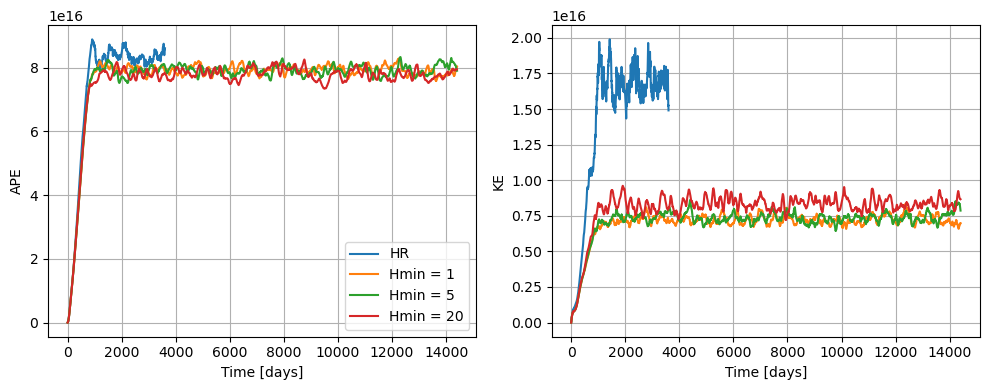

In [19]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
ds_HR['oce_stats'].APE.sum('Interface').plot(label='HR')
ds_hmin1['oce_stats'].APE.sum('Interface').plot(label='Hmin = 1')
ds_hmin5['oce_stats'].APE.sum('Interface').plot(label='Hmin = 5')
ds_hmin20['oce_stats'].APE.sum('Interface').plot(label='Hmin = 20')
plt.grid()
plt.legend()

plt.subplot(122)
ds_HR['oce_stats'].KE.sum('Layer').plot(label='HR')
ds_hmin1['oce_stats'].KE.sum('Layer').plot(label='Hmin = 1')
ds_hmin5['oce_stats'].KE.sum('Layer').plot(label='Hmin = 5')
ds_hmin20['oce_stats'].KE.sum('Layer').plot(label='Hmin = 20')
plt.grid()

plt.tight_layout()

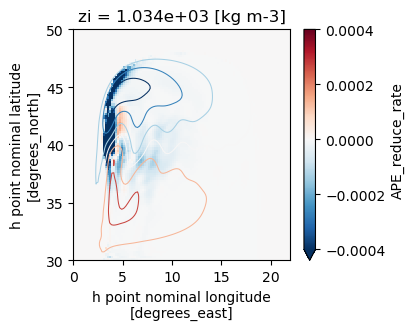

In [20]:
plt.figure(figsize=(3.5,3))
ds_hmin1['prog'].APE_reduce_rate.plot(vmin = -4e-4)
ds_hmin1['prog'].e.sel(Time=slice(1000, None)).isel(zi=0).mean('Time').plot.contour(levels=np.linspace(-1.8, 1.8, 7), linewidths=0.75)

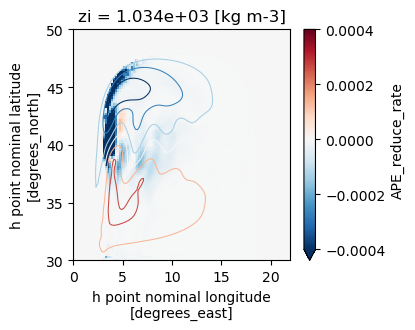

In [21]:
plt.figure(figsize=(3.5,3))
ds_hmin5['prog'].APE_reduce_rate.plot(vmin = -4e-4)
ds_hmin5['prog'].e.sel(Time=slice(1000, None)).isel(zi=0).mean('Time').plot.contour(levels=np.linspace(-1.8, 1.8, 7), linewidths=0.75)

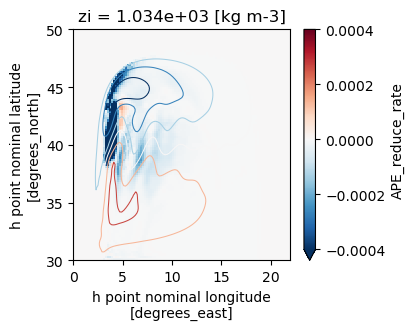

In [22]:
plt.figure(figsize=(3.5,3))
ds_hmin20['prog'].APE_reduce_rate.plot(vmin = -4e-4)
ds_hmin20['prog'].e.sel(Time=slice(1000, None)).isel(zi=0).mean('Time').plot.contour(levels=np.linspace(-1.8, 1.8, 7), linewidths=0.75)

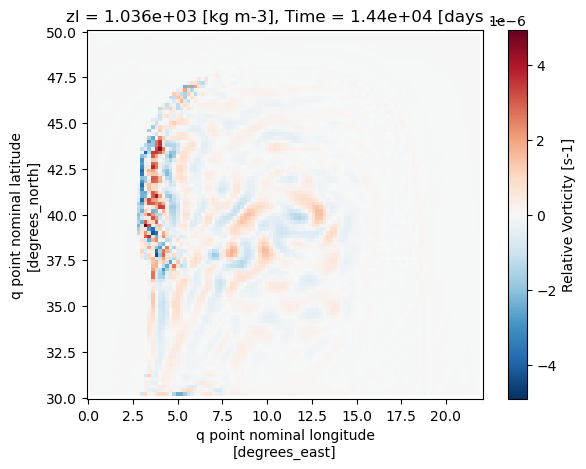

In [24]:
ds_hmin20['prog'].RV.isel(zl=1, Time=-1).plot()

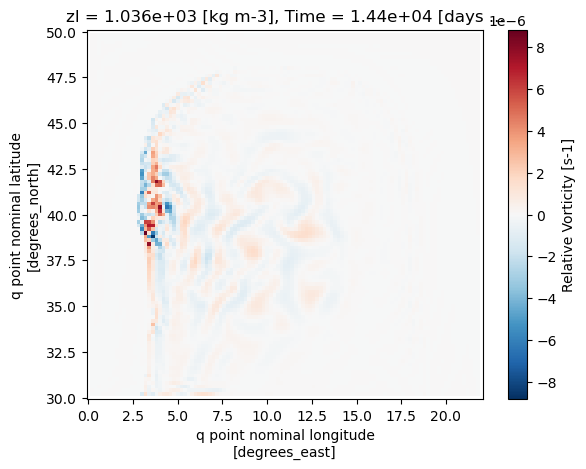

In [26]:
ds_hmin5['prog'].RV.isel(zl=1, Time=-1).plot()

In [28]:
ds_HR['prog']

<xarray.Dataset>
Dimensions:  (xq: 441, yh: 400, zl: 2, Time: 720, xh: 440, yq: 401, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 0.05 0.1 0.15 0.2 ... 21.8 21.85 21.9 21.95 22.0
  * yh       (yh) float64 30.02 30.07 30.12 30.18 ... 49.83 49.88 49.92 49.98
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 3.59e+03 3.595e+03 3.6e+03
  * xh       (xh) float64 0.025 0.075 0.125 0.175 ... 21.83 21.88 21.93 21.98
  * yq       (yq) float64 30.0 30.05 30.1 30.15 30.2 ... 49.85 49.9 49.95 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables:
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(73, 2, 400, 441), meta=np.ndarray>
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(73, 2, 401, 440), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(73, 2, 400, 440), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(73, 3, 400, 440), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float32 dask.array<chunksize=(73, 2, 401, 441), meta=np.ndarray>
Attributes:
    filename:   prog__0001_006.nc
    title:      MOM Experiment
    grid_type:  regular
    grid_tile:  N/A

In [62]:
def plot_panels(id):

    plt.figure(figsize=(10, 12))

    vmin = -5e-6

    plt.subplot(321) 
    ds_HR['prog'].RV.isel(zl=1, Time=id).plot(vmin=vmin)
    plt.title('HR')

    plt.subplot(322)
    ds_filt.RV.coarsen(xh=4,yh=4, boundary='trim').mean().isel(zl=1, Time=id).plot(vmin=vmin)
    plt.title('HR - coarsened')
    
    
    plt.subplot(323)
    ds_LR['prog'].RV.isel(zl=1, Time=id).plot(vmin=vmin)
    plt.title('LR')

    plt.subplot(324)
    ds_hmin1['prog'].RV.isel(zl=1, Time=id).plot(vmin=vmin)
    plt.title('hmin = 1')
        
    plt.subplot(325) 
    ds_hmin5['prog'].RV.isel(zl=1, Time=id).plot(vmin=vmin)
    plt.title('hmin = 5')
    
    plt.subplot(326) 
    ds_hmin20['prog'].RV.isel(zl=1, Time=id).plot(vmin=vmin)
    plt.title('hmin = 20')


    plt.tight_layout()
    


In [69]:
import warnings
warnings.filterwarnings("ignore")

/ext3/miniforge/lib/python3.10/site-packages/xarray/core/variable.py:2229: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  reshaped, axes = self.coarsen_reshape(windows, boundary, side)


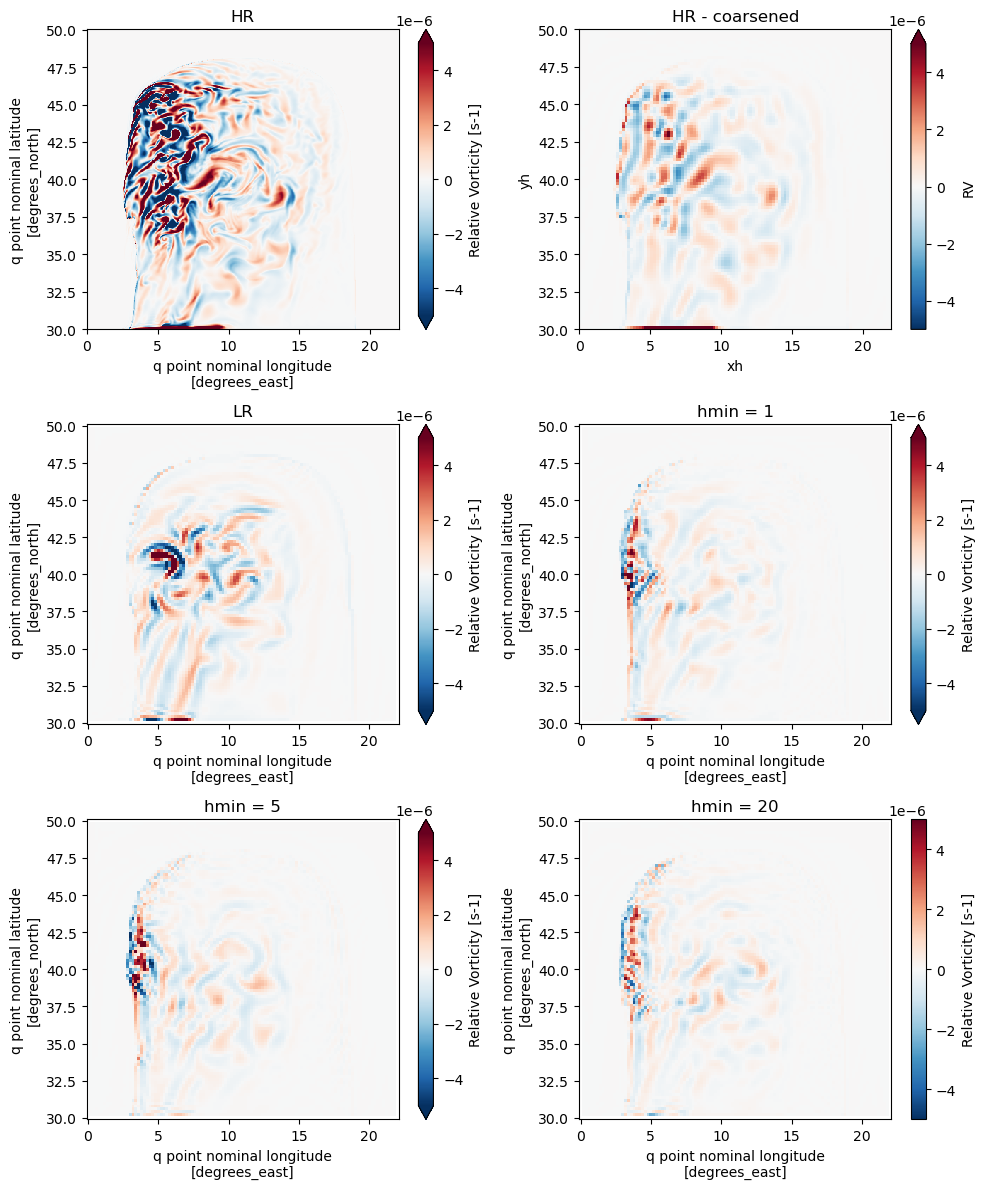

In [68]:
plot_panels(-1)

In [70]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [ ]:
create_animation(plot_panels, range(0,720, 3), 'DoubleGyre_compare.gif', dpi=100, FPS=4)